# NOAA NDBC buoy data analysis

Lesson for learning python.<br> Practicing downloading, opening, and analyzing buoy data from NDBC.


With JupyterLite, your code is broken up into “Cells”, and you can run each cell individually. This allows you to work progressively and view the results of each chunk of code. Hover over the symbols at the top of this notebook to see what they do. 

### 1. Import packages

First we’ll import some commonly used libraries into our notebook that are used to open, manipulate, and plot data. See the four packages listed in the cell below: [pandas](https://pypi.org/project/pandas/), [matplotlib](https://matplotlib.org/), [numpy](https://numpy.org/), and [datetime](https://docs.python.org/3/library/datetime.html).

Click on the gray code cell below. A border should appear around the cell.

To run the cell, press **<em>shift + enter</em>** on your keyboard, or click the single right-pointing arrow on the ribbon at the top of the notebook. While the code is running, an asterisk [\*] will appear in the brackets left of the cells. You will know the code cell ran successfully if a number [1] appears in the bracket.

In [2]:
# this is a comment, using a hashtag
# use comments to make notes of what you're doing

# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### 2. Import NDBC buoy data


<img src="supp_info/data_file.png" width="200" align="right"> 


Now we'll upload an NDBC buoy data file we have downloaded.

----- INSTRUCTIONS TO DOWNLOAD -----

The left side of the screen shows folders on the JupyterLite webpage. **<em>Drag and drop</em>** your NDBC buoy data text file into the main folder containing this notebook, or use the “Upload Files” icon (upward pointing arrow on the top left of the page) to upload your file. 

Once the file is uploaded, assign the name of your text file to the variable `filename` in the code cell below. Make sure to use quotation marks around the name as in the example below. Note: be sure to change the name in the example code below so the filename matches your filename. 

**<em>Run</em>** the cell.


<!-- ![SegmentLocal](/Users/username/some-folder/191px-Seven_segment_display-animated.gif "segment")
<img src="FileName.gif" width="750" align="center"> -->

<!-- ![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess") -->

In [7]:
# specify the name of the text file
filename = '46246h2016.txt' 

# use pandas to read text file into dataframe called 'df_raw'
df_raw = pd.read_table(filename, delim_whitespace=True, header = [0,1])
df_raw

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
0,2016,1,3,22,28,999,99.0,99.0,3.85,9.88,7.87,211,9999.0,999.0,7.4,999.0,99.0,99.0
1,2016,1,3,22,58,999,99.0,99.0,4.08,9.88,7.66,183,9999.0,999.0,7.4,999.0,99.0,99.0
2,2016,1,3,23,28,999,99.0,99.0,4.03,9.88,7.96,168,9999.0,999.0,7.4,999.0,99.0,99.0
3,2016,1,3,23,58,999,99.0,99.0,3.68,9.88,7.84,179,9999.0,999.0,7.3,999.0,99.0,99.0
4,2016,1,4,0,28,999,99.0,99.0,3.86,9.09,7.88,181,9999.0,999.0,7.3,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16312,2016,12,31,21,58,999,99.0,99.0,2.85,12.50,8.31,282,9999.0,999.0,6.8,999.0,99.0,99.0
16313,2016,12,31,22,28,999,99.0,99.0,3.24,15.38,9.36,283,9999.0,999.0,6.8,999.0,99.0,99.0
16314,2016,12,31,22,58,999,99.0,99.0,2.96,15.38,9.47,285,9999.0,999.0,6.8,999.0,99.0,99.0


### 3. Clean the data

In [8]:
# list of data values representing NaNs
NaNs = ['999', '999.0', '99.0', '9999.0']

# read in data again, but drop any columns filled with only NaNs
df = pd.read_table(filename, delim_whitespace=True, header = [0,1], na_values = NaNs).dropna(axis='columns', how='all')


In [6]:
df

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,MWD,WTMP
,#yr,mo,dy,hr,mn,m,sec,sec,degT,degC
0,2016,1,3,22,28,3.85,9.88,7.87,211.0,7.4
1,2016,1,3,22,58,4.08,9.88,7.66,183.0,7.4
2,2016,1,3,23,28,4.03,9.88,7.96,168.0,7.4
3,2016,1,3,23,58,3.68,9.88,7.84,179.0,7.3
4,2016,1,4,0,28,3.86,9.09,7.88,181.0,7.3
...,...,...,...,...,...,...,...,...,...,...
16312,2016,12,31,21,58,2.85,12.50,8.31,282.0,6.8
16313,2016,12,31,22,28,3.24,15.38,9.36,283.0,6.8
16314,2016,12,31,22,58,2.96,15.38,9.47,285.0,6.8


In [7]:
# read date data into individual data arrays
years = df['#YY']
months = df['MM']
days = df['DD']
hours = df['hh']
mins = df['mm']

# combine them into a single array called ‘dates’
dates = [datetime.datetime.strptime(f'{y}-{m:02d}-{d:02d}T{h:02d}:{mm:02d}', '%Y-%m-%dT%H:%M') for y, m, d, h, mm in zip(years['#yr'], months['mo'], days['dy'], hours['hr'], mins['mn'])]

In [8]:
# add the dates to a new data column in df called 'date'
df['date'] = dates

In [9]:
df

,#YY,MM,DD,hh,mm,WVHT,DPD,APD,MWD,WTMP,date
,#yr,mo,dy,hr,mn,m,sec,sec,degT,degC,
0,2016,1,3,22,28,3.85,9.88,7.87,211.0,7.4,2016-01-03 22:28:00
1,2016,1,3,22,58,4.08,9.88,7.66,183.0,7.4,2016-01-03 22:58:00
2,2016,1,3,23,28,4.03,9.88,7.96,168.0,7.4,2016-01-03 23:28:00
3,2016,1,3,23,58,3.68,9.88,7.84,179.0,7.3,2016-01-03 23:58:00
4,2016,1,4,0,28,3.86,9.09,7.88,181.0,7.3,2016-01-04 00:28:00
...,...,...,...,...,...,...,...,...,...,...,...
16312,2016,12,31,21,58,2.85,12.50,8.31,282.0,6.8,2016-12-31 21:58:00
16313,2016,12,31,22,28,3.24,15.38,9.36,283.0,6.8,2016-12-31 22:28:00
16314,2016,12,31,22,58,2.96,15.38,9.47,285.0,6.8,2016-12-31 22:58:00


<AxesSubplot:>

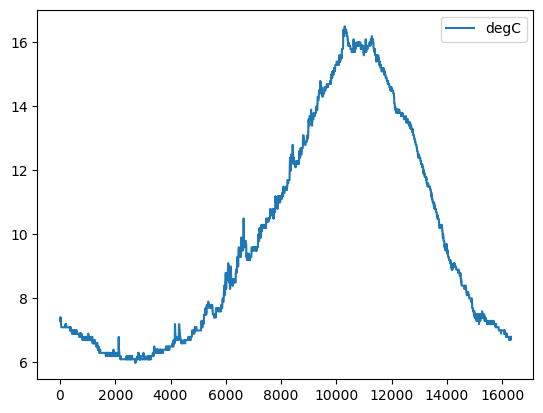

In [10]:
df['WTMP'].plot()

<AxesSubplot:xlabel='date'>

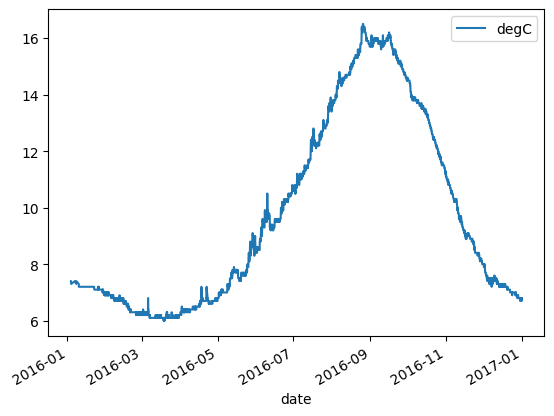

In [11]:
df.plot(x='date', y='WTMP', kind = 'line')

<AxesSubplot:xlabel='date'>

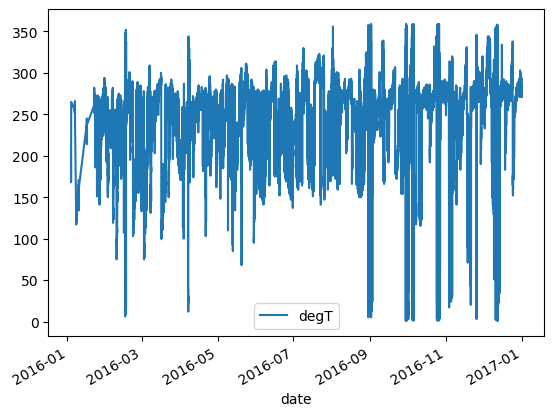

In [12]:
df.plot(x='date', y='MWD', kind = 'line')

<AxesSubplot:ylabel='Frequency'>

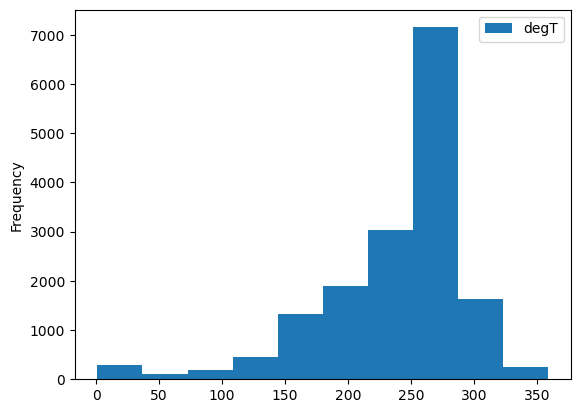

In [13]:
df['MWD'].plot(kind='hist') 


percentage of time water temp is above 10 degC: 40.5%



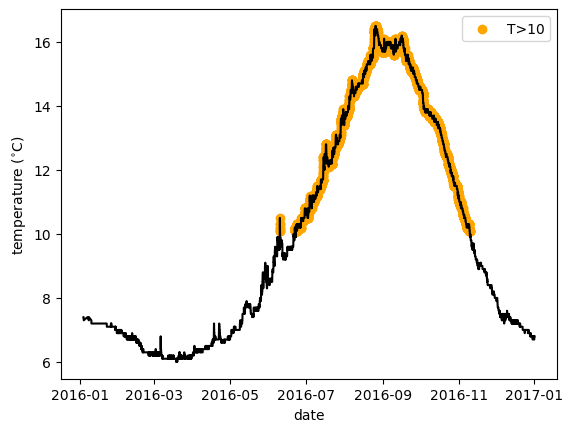

In [14]:
# temperature threshold (degC)
T = 10

# total time series length
total_duration = len(df)
# length of time with temperature above threshold
duration_above = np.sum(df['WTMP'] > T).values[0]
# percentage of time above temperature threshold
time_per = 100*duration_above/total_duration

print(f'\npercentage of time water temp is above {T} degC: {time_per:.1f}%\n')

# plot the data
plt.plot(df['date'], df['WTMP'], c='black')
plt.scatter(df[(df['WTMP'] > T).any(axis=1)].date, df[(df['WTMP'] > T).any(axis=1)].WTMP, c='orange', label=f'T>{T}');
plt.xlabel('date')
plt.ylabel('temperature ($^{\circ}$C)')
plt.legend();


max WTMP 6.0 degC occurred on 2016-08-25T22:28:00.000000000
min WTMP 6.0 degC occurred on 2016-03-18T12:58:00.000000000



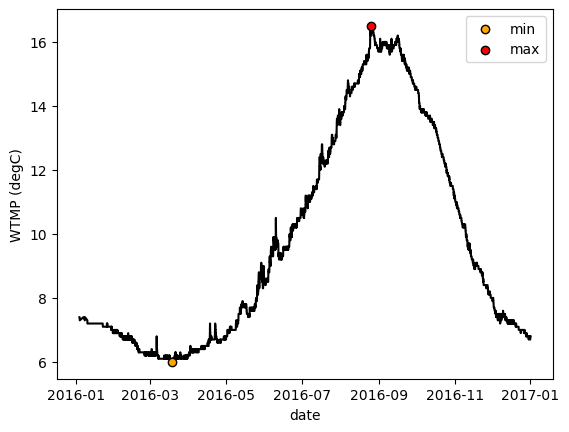

In [15]:
# specify data columm
col = 'WTMP'

# find min/max values
min_val = df[col].min()[0]
max_val = df[col].max()[0]

# find dates of min/max value occurrences
date_min = df.iloc[df[col].idxmin()].date.values[0]
date_max = df.iloc[df[col].idxmax()].date.values[0]

# print
print(f"\nmax {col} {min_val} {df[col].columns[0]} occurred on {date_max}")
print(f"min {col} {min_val} {df[col].columns[0]} occurred on {date_min}\n")

# plot the data
plt.plot(df['date'], df[col], c='black', zorder=-1)
plt.scatter(date_min, min_val, c='orange', edgecolor='k', label='min');
plt.scatter(date_max, max_val, c='red', edgecolor='k', label='max');
plt.xlabel('date')
plt.ylabel(f'{col} ({df[col].columns[0]})')
plt.legend();



In [16]:
# create a function to find index of date in python range 
def subset_by_date(date_i, date_f, df):
    # date_i: initial date 
    # date_f: final date 
    # df: pandas dataframe
    indices = []
    for date in [date_i, date_f]:
        if np.sum(df.date == date) == 0: 
            print(f'date {date} not in file') # print error if given date not in file
        else:
        # find index of specified date
            index = df[df.date == date].index.values[0]
            indices.append(index)
    print(f'\nsubset data between {date_i} and {date_f}\n')
    return df[indices[0]:indices[1]]



subset data between 2016-06-01 01:28:00 and 2016-07-31 23:28:00



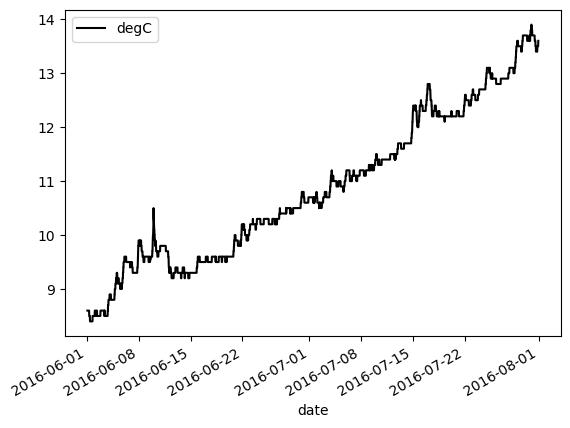

In [17]:
# specify start and end dates of desired date range
date1 = datetime.datetime(year = 2016, month = 6, day = 1, hour = 1, minute = 28)
date2 = datetime.datetime(year = 2016, month = 7, day = 31, hour = 23, minute = 28)

# run the function to create subsetted dataframe
df_subset = subset_by_date(date1, date2, df)
# make plot
df_subset.plot(x='date', y='WTMP', kind = 'line', color='black');